<a href="https://colab.research.google.com/github/vpagonis/Classical_Mechanics_2nd_Edition/blob/main/Chapter8/Python_Codes_Chapter_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example 8.3

---------------------------- CODE OUTPUT ----------------------------- 

The Euler equation is:

R*l*m*w**2*cos(t*w - q(t)) - g*l*m*sin(q(t)) -
l**2*m*Derivative(q(t), (t, 2))  = 0


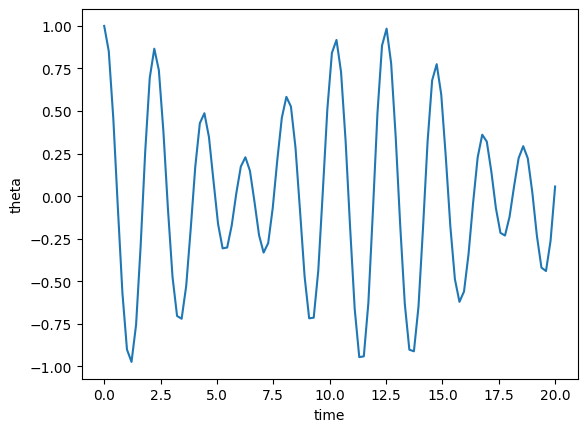

In [ ]:
%reset -f

from sympy import diff, symbols, Function, euler_equations, nsimplify,\
sin, cos
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import textwrap

print('-'*28,'CODE OUTPUT','-'*29,'\n')

wrapper = textwrap.TextWrapper(width=60)

D, t, m, g, w, R, l = symbols('D,t,m,g,w,R,l',positive=True)
q = Function('q')(t) # we use q instead of theta

L = 1/2*m*(R**2*w**2 + l**2*diff(q,t)**2 + \
    2*R*l*w*diff(q,t)*sin(q-w*t)) - \
        m*g*(R*sin(w*t) - l*cos(q))

euler = nsimplify(euler_equations(L,q,t)[0].expand().lhs)
euler_string = wrapper.fill(str(euler))

print('The Euler equation is:\n')
print(euler_string, ' = 0')

# Next, we integrate the equation of motion numerically
R, w, l, g = 0.2, 2.5, 1.0, 9.8

def deriv(y, t):
    q, v = y   #let v = dq/dt
    dydt = [v, R*w**2/l*np.cos(q-w*t)-g/l*np.sin(q)]
    return dydt

ics = [1,0]
t = np.linspace(0,20,100)
soln = odeint(deriv, ics, t)

plt.plot(t,soln[:,0])
plt.xlabel('time')
plt.ylabel('theta')
plt.show()


# Example 8.4

In [ ]:
%reset -f

from sympy import diff, symbols, Function, euler_equations, \
simplify, solve
import textwrap

print('-'*28,'CODE OUTPUT','-'*29,'\n')

wrapper = textwrap.TextWrapper(width=70)

t, m, g, a, w, R = symbols('t,m,g,a,w,R',positive=True)
r = Function('r')

L = 1/2*m*(diff(r(t),t)**2 + r(t)**2*w**2 + \
    4*r(t)**2*a**2*diff(r(t),t)**2) - \
        m*g*a*r(t)**2

euler = simplify(euler_equations(L,r(t),t)[0]).lhs

print('The Euler equation is:\n\n')
print(wrapper.fill(str(euler)), '=0')

# substitute derivatives = 0
find_a = solve(euler.subs([(diff(r(t),t,t),0),\
    (diff(r(t),t),0),(r(t),R)]),a)[0]
print('\na = ', find_a)


---------------------------- CODE OUTPUT ----------------------------- 

The Euler equation is:


m*(-4.0*a**2*r(t)**2*Derivative(r(t), (t, 2)) -
4.0*a**2*r(t)*Derivative(r(t), t)**2 - 2.0*a*g*r(t) + 1.0*w**2*r(t) -
1.0*Derivative(r(t), (t, 2))) =0

a =  0.5*w**2/g


# Example 8.5

In [ ]:
%reset -f

from sympy import diff, symbols, Function, euler_equations
from sympy import  simplify, solve, sin, cos, Derivative
import textwrap

print('-'*28,'CODE OUTPUT','-'*29,'\n')

wrapper = textwrap.TextWrapper(width=74)

M, m, g, l, q,t = symbols('M,m,g,l,q,t',positive=True)
# we use q symbol for the angle theta

x1 = Function('x1')
x2 = Function('x2')

L = 1/2*M*diff(x1(t),t)**2 + 1/2*m*(diff(x1(t),t)**2 + \
    diff(x2(t),t)**2 + \
         2*diff(x1(t),t)*diff(x2(t),t)*cos(q)) - \
            m*g*(l-x2(t))*sin(q)

euler = euler_equations(L,(x1(t),x2(t)),t)
print('The Euler equations are:\n\n')
print(wrapper.fill(str(euler[0])))
print('\n' + wrapper.fill(str(euler[1])))

x_solns = simplify(\
    solve(euler,(diff(x1(t),t,t),diff(x2(t),t,t))))

print('\nThe second derivatives of x1, x2 are:\n')
print('a1 =', x_solns[Derivative(x1(t), (t, 2))])
print('a2 =', \
     simplify(x_solns[Derivative(x2(t), (t, 2))]))


---------------------------- CODE OUTPUT ----------------------------- 

The Euler equations are:


Eq(-1.0*(M*Derivative(x1(t), (t, 2)) + m*(cos(q)*Derivative(x2(t), (t, 2))
+ Derivative(x1(t), (t, 2)))), 0)

Eq(g*m*sin(q) - 1.0*m*(cos(q)*Derivative(x1(t), (t, 2)) +
Derivative(x2(t), (t, 2))), 0)

The second derivatives of x1, x2 are:

a1 = g*m*sin(q)*cos(q)/(-M + m*cos(q)**2 - m)
a2 = g*(M + m)*sin(q)/(M + m*sin(q)**2)


# Example 8.7

---------------------------- CODE OUTPUT ----------------------------- 

theta-dot =  ptheta/(l**2*m)

ptheta-dot =  -g*l*m*sin(theta)


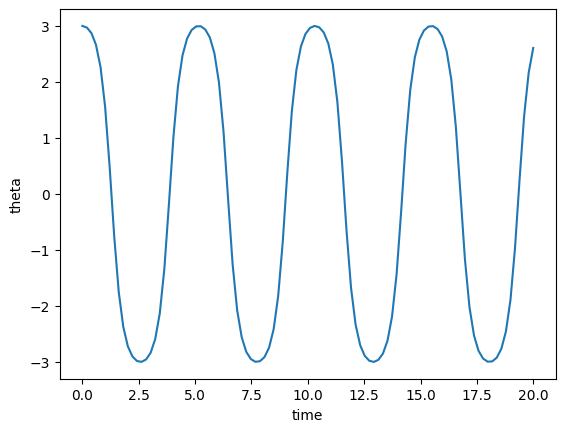

In [ ]:
%reset -f

from sympy import diff, symbols, Function, cos

from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

print('-'*28,'CODE OUTPUT','-'*29,'\n')

ptheta, m, l, g, theta = symbols('ptheta, m, l, g, theta ',real=True)

H = ptheta**2/(2*m*l**2)-m*g*l*cos(theta)

print('theta-dot = ', diff(H,ptheta))

print('\nptheta-dot = ', -diff(H,theta))

m, l, g = 1, 1, 9.8

def deriv(y, t):
    q, p = y   #let v = dq/dt
    dydt = [p/(m*l**2), -m*g*l*np.sin(q)]
    return dydt

ics = [3,0]
t = np.linspace(0,20,100)

soln = odeint(deriv, ics, t)

plt.plot(t,soln[:,0])
plt.xlabel('time')
plt.ylabel('theta')
plt.show()


# Example 8.9

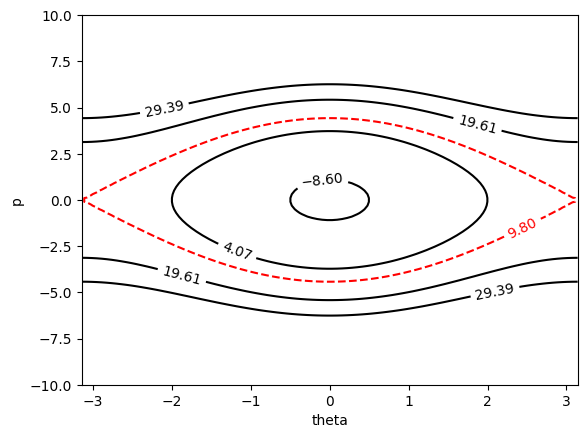

In [ ]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt

m, l, g = 1, 1, 9.8

q_range = np.linspace(-np.pi,np.pi,100)
p_range = np.linspace(-10,10,100)

q, p = np.meshgrid(q_range,p_range)

H = p**2/(m*l**2) - m*g*l*np.cos(q)

contour_plot = plt.contour(q,p,H, \
        levels=[-8.6,4.07,9.8,19.61,29.39],colors=['k','k','r','k','k'],\
        linestyles=['solid','solid', 'dashed','solid','solid'])

plt.clabel(contour_plot)
plt.xlabel('theta')
plt.ylabel('p')
#plt.savefig('ex-8-9-python.eps')
plt.show()
